# Investigating 1/F changes in auditory oddball paradigm

## Data Description

We adopted a roving oddball paradigm. The trains of repetitive tones of different frequencies were randomly presented. Epidural ECoG recordings were taken in the passive listening condition while monkeys were awake.
ECoG data were sampled at 1KHz.


Komatsu, M., Takaura, K., & Fujii, N. (2015). "Mismatch negativity in common marmosets: Whole-cortical recordings with multi-channel electrocorticograms." Scientific Reports, 5, 15006.

Canales-Johnson, A., Borges, A. F. T., Komatsu, M., Fujii, N., Fahrenfort, J. J., Miller, K. J., & Noreika, V. (2021). Broadband Dynamics Rather than Frequency-Specific Rhythms Underlie Prediction Error in the Primate Auditory Cortex. Journal of Neuroscience, 41(45), 9374-9391.

## Init

In [258]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
from mne_bids import BIDSPath, read_raw_bids

import os
import re

import mne
from mne.viz import plot_alignment, snapshot_brain_montage

from scipy.io import loadmat

from neurodsp.spectral import compute_spectrum
from neurodsp.filt import filter_signal

from fooof import FOOOF, FOOOFGroup

In [259]:
subfolder = "./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/"
#subfolder = "./20151008S2_Auditory+Oddball_Go_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/"
fs = 1000

## load data

In [260]:
# Function to extract channel name from filename
def extract_channel_name(filename):
    # Assuming the channel name is between 'ch' and '.mat'
    start_index = filename.find('ch') + 2
    end_index = filename.find('.mat')
    return filename[start_index:end_index]

# Function to apply common median reference to the data
def apply_common_median_reference(raw):
    picks = mne.pick_types(raw.info, eeg=True, exclude='bads')
    raw.set_eeg_reference(ref_channels='average', projection=True, verbose=False)

In [261]:
# Folder containing data files
data_folder = './20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap'
subfolder = './20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap'

# List all .mat files in the folder
mat_files = [file for file in os.listdir(data_folder) if file.endswith('.mat')]

### Generate reference

In [262]:
# Loop through data files and apply common median reference
for mat_file in mat_files:
    file_path = os.path.join(data_folder, mat_file)
    
    # Load ECoG data from .mat file
    print(file_path)
    match = re.search(r'(\d+).mat', file_path)
    if match:
        match = match[0].split(".mat")[0]
    else:
        break

    ecog_data = loadmat(file_path)["ECoGData_ch" + match]

    # Extract channel name from filename
    channel_name = extract_channel_name(mat_file)

    # Create MNE Raw object
    info = mne.create_info(
        ch_names=[channel_name], 
        sfreq=fs, 
        ch_types='ecog',
        verbose=False
    )
    raw = mne.io.RawArray(ecog_data, info, verbose=False)

    # Apply common median reference
    apply_common_median_reference(raw)
    
    #raw.apply_proj()

    #raw.set_eeg_reference(ref_channels='average', projection=True)
    
    
    # Save the preprocessed data
    #output_path = os.path.join(data_folder, f'rereferenced_{mat_file}')
    output_path = os.path.join(data_folder, f'rereferenced_abc.fif')
    raw.save(output_path, overwrite=True, verbose=False)

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch52.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch2.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch3.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch53.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch47.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch51.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch1.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch44.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch50.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch54.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch40.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch4.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch5.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch41.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch55.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch43.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch57.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch7.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch6.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch56.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch42.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch25.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch31.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch19.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch18.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch30.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch24.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch32.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch26.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch27.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch33.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch37.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch23.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch22.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch36.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch20.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch34.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch35.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch21.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch10.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch38.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch39.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch11.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch13.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch12.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch16.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch17.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch29.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch15.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch14.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch28.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch64.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch58.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch8.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch9.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch59.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch49.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch61.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch60.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch48.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch62.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch63.mat


## Generate spectra before and after oddball

In [263]:
data = mne.io.read_raw_fif(subfolder + "/rereferenced_abc.fif").get_data()[0]

data = filter_signal(data, fs, "highpass", f_range=2.)


repEvent = loadmat("./repEvent.mat")

train_onset = repEvent["repEvent"][:,5]

arr_before = []
arr_after = []

jump = 1000

for index, onset in enumerate(train_onset):
    freqs, powers_bef = compute_spectrum(data[onset-jump:onset], fs)
    freqs, powers_aft = compute_spectrum(data[onset:onset+jump], fs)
    
    #np.array(arr_after.append(np.abs(powers_aft)))
    #np.array(arr_before.append(np.abs(powers_bef)))
    
    np.array(arr_after.append(powers_aft))
    np.array(arr_before.append(powers_bef))
    


fm_before = FOOOFGroup(verbose=False)
fm_after = FOOOFGroup(verbose=False)

Opening raw data file ./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average ECOG reference (1 x 1)  idle
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/1018719665.py:1: RuntimeWarning: This filename (./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(subfolder + "/rereferenced_abc.fif").get_data()[0]


### Fooof fitting

#### Mean before

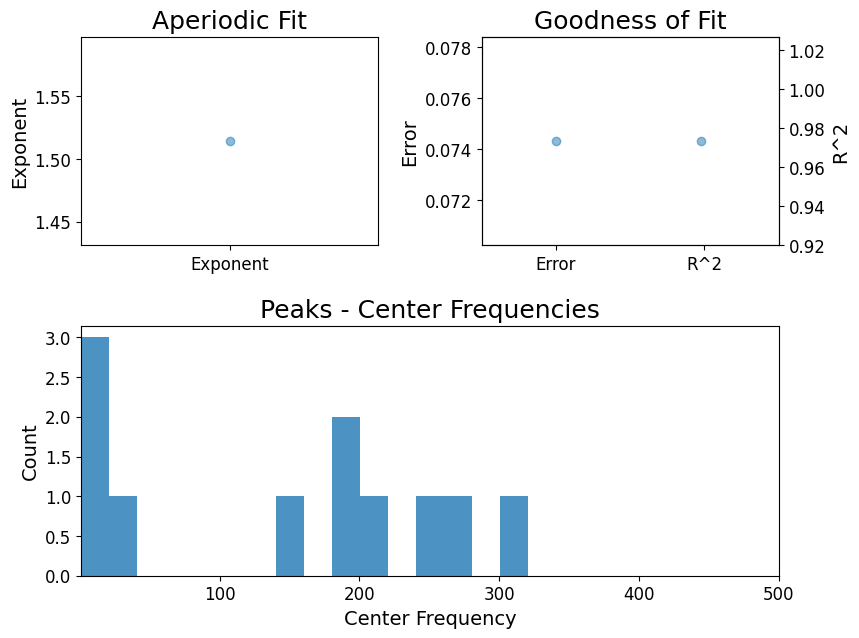

In [264]:
fm_before.fit(
    np.array(freqs), 
    np.array([np.mean(arr_before, axis=0)])
)
fm_before.plot()

#### Mean after

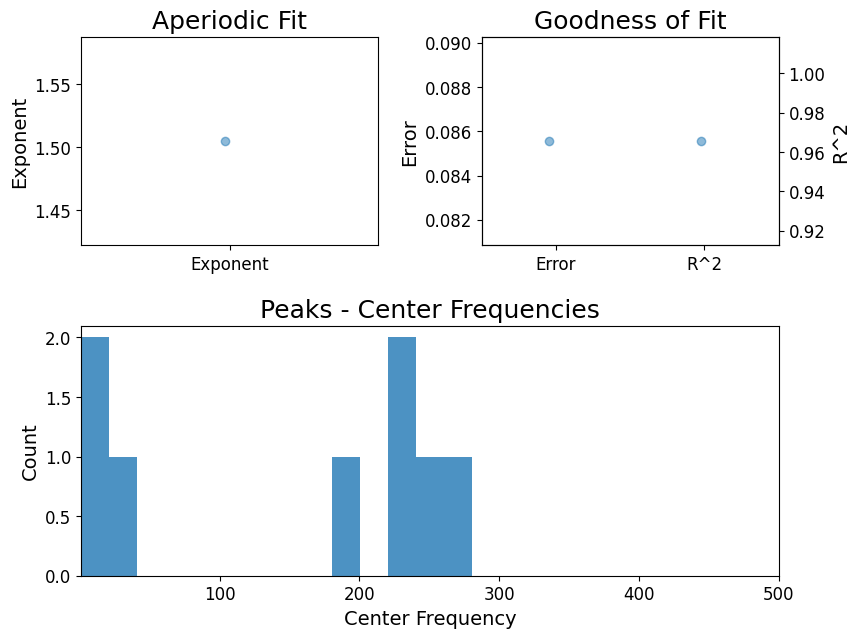

In [265]:
fm_after.fit(
    np.array(freqs), 
    np.array([np.mean(arr_after, axis=0)])
)
fm_after.plot()

#### All before (compute ~5min)

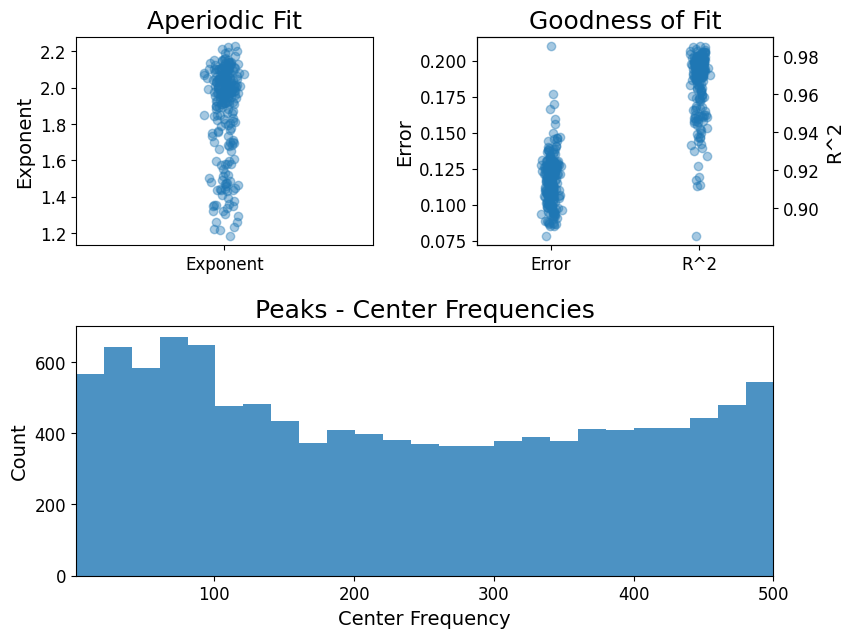

In [289]:
fm_before.fit(
    np.array(freqs), 
    np.array(arr_before)
)
fm_before.plot()

#### All after (compute ~5min)

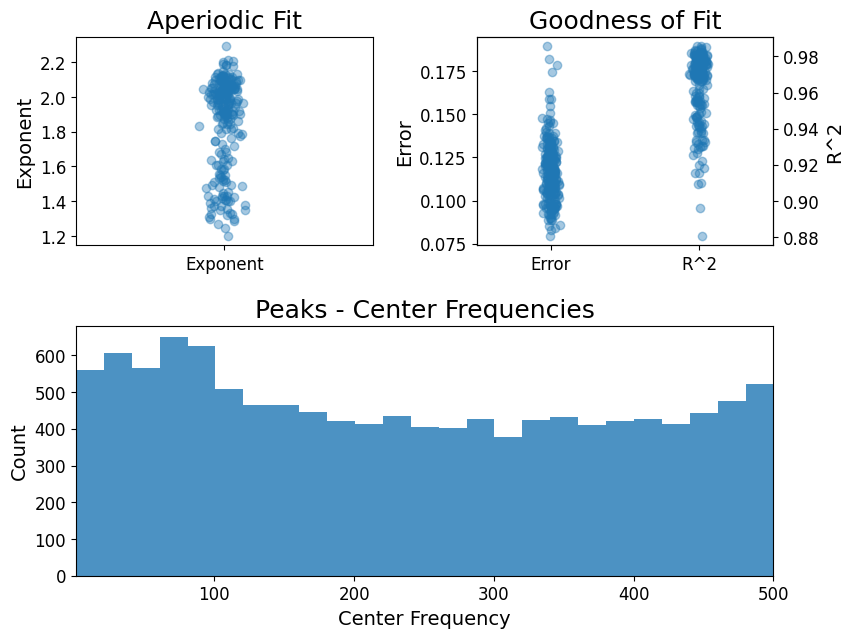

In [281]:
fm_after.fit(
    np.array(freqs), 
    np.array(arr_after)
)
fm_after.plot()

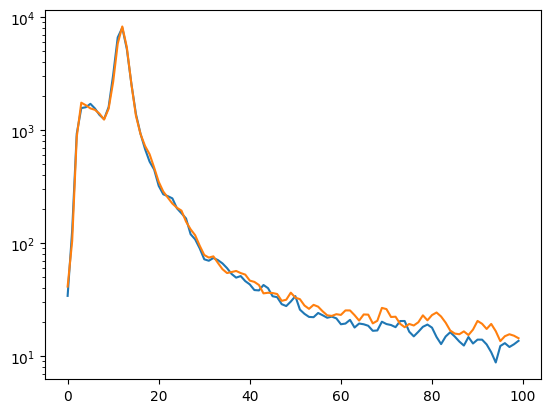

In [268]:
plt.semilogy(freqs[:100], (np.mean(arr_before, axis=0)[:100]))
plt.semilogy(freqs[:100], (np.mean(arr_after, axis=0)[:100]))

plt.show()

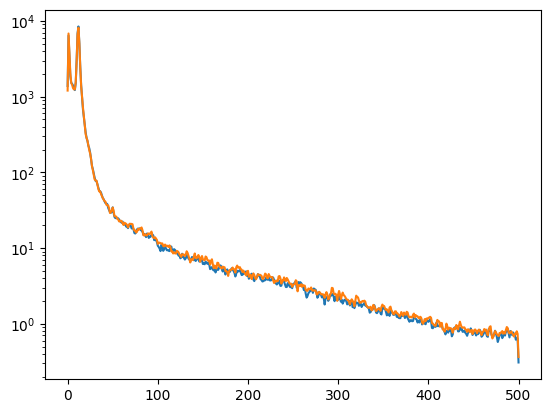

In [282]:
plt.semilogy(freqs[:], (np.mean(arr_before, axis=0)[:]))
plt.semilogy(freqs[:], (np.mean(arr_after, axis=0)[:]))

plt.show()

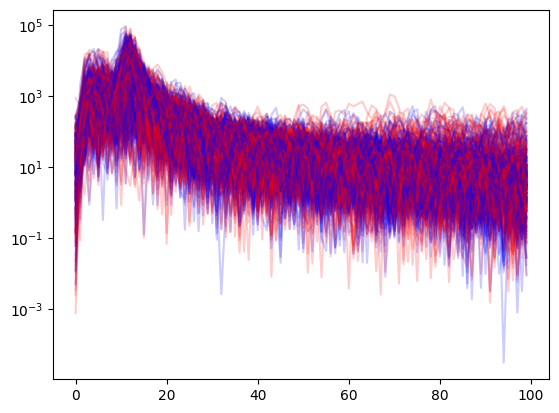

In [269]:
for index, item in enumerate(arr_before):
    plt.semilogy(freqs[:100], (arr_before[index][:100]), color="blue", alpha=.2)
    plt.semilogy(freqs[:100], (arr_after[index][:100]), color="red", alpha=.2)

plt.show()

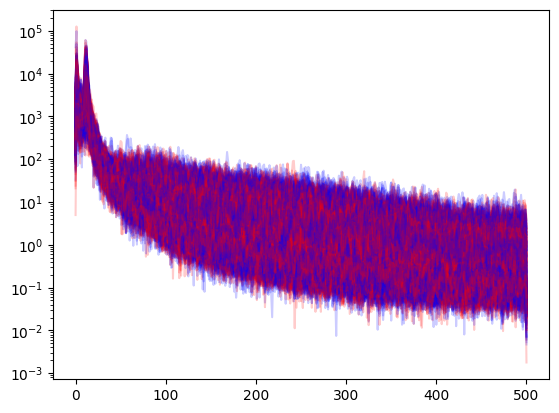

In [283]:
for index, item in enumerate(arr_before):
    plt.semilogy(freqs, (arr_before[index]), color="blue", alpha=.2)
    plt.semilogy(freqs, (arr_after[index]), color="red", alpha=.2)

plt.show()

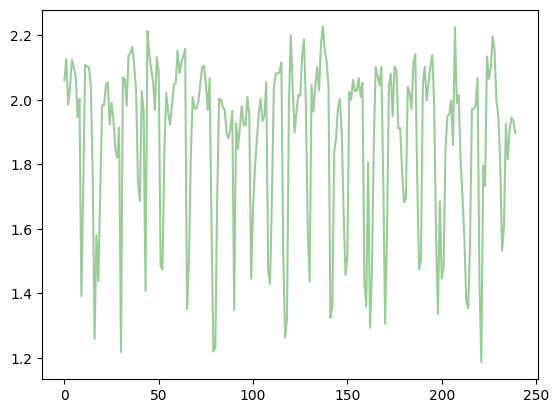

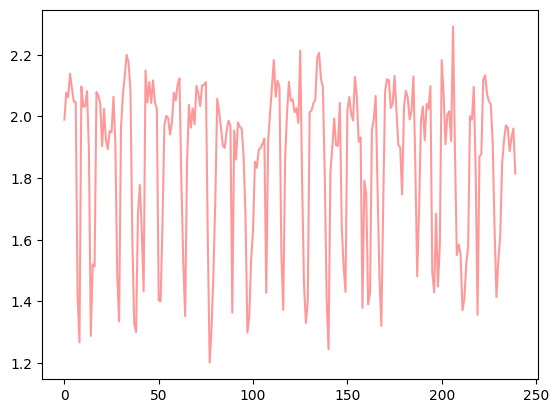

In [295]:
exps_bef = fm_before.get_params('aperiodic_params', 'exponent')
exps_aft = fm_after.get_params('aperiodic_params', 'exponent')

plt.plot(range(len(exps_bef)), exps_bef, alpha=.4, label="FOOOF fit: before", color="green")
plt.show()
plt.plot(range(len(exps_aft)), exps_aft, alpha=.4, label="FOOOF fit: after", color="red")
plt.show()

# !Redundant: manual method going through channels without rereferencing

In [270]:
data = mne.io.read_raw_fif(subfolder + "/rereferenced_abc.fif").get_data()[0]


#data = filter_signal(data, fs, "bandpass",f_range=(.1, ))
#data = filter_signal(data, fs, "highpass",f_range=2)

repEvent = loadmat("./repEvent.mat")

train_onset = repEvent["repEvent"][:,5]

ch_bef = []
ch_aft = []

for i in range(64):
    if i != 44 and i != 45:
        data = loadmat(subfolder + f"/ECoG_ch{i + 1}.mat")[f"ECoGData_ch{i + 1}"][0]

        arr_before = []
        arr_after = []

        jump = 5000

        for index, onset in enumerate(train_onset):
            freqs, powers_bef = compute_spectrum(data[onset-jump:onset], fs)
            #freqs, powers_aft = compute_spectrum(data[onset:onset+jump], fs)
            freqs, powers_aft = compute_spectrum(data[onset:onset+jump], fs)
            
            np.array(arr_after.append(powers_aft))
            np.array(arr_before.append(powers_bef))
            
        np.array(ch_bef.append(np.mean(arr_before, axis = 0)))
        np.array(ch_aft.append(np.mean(arr_after, axis = 0)))


fm_before2 = FOOOFGroup(verbose=False)
fm_after2 = FOOOFGroup(verbose=False)

Opening raw data file ./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average ECOG reference (1 x 1)  idle
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_75648/1050680234.py:1: RuntimeWarning: This filename (./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(subfolder + "/rereferenced_abc.fif").get_data()[0]


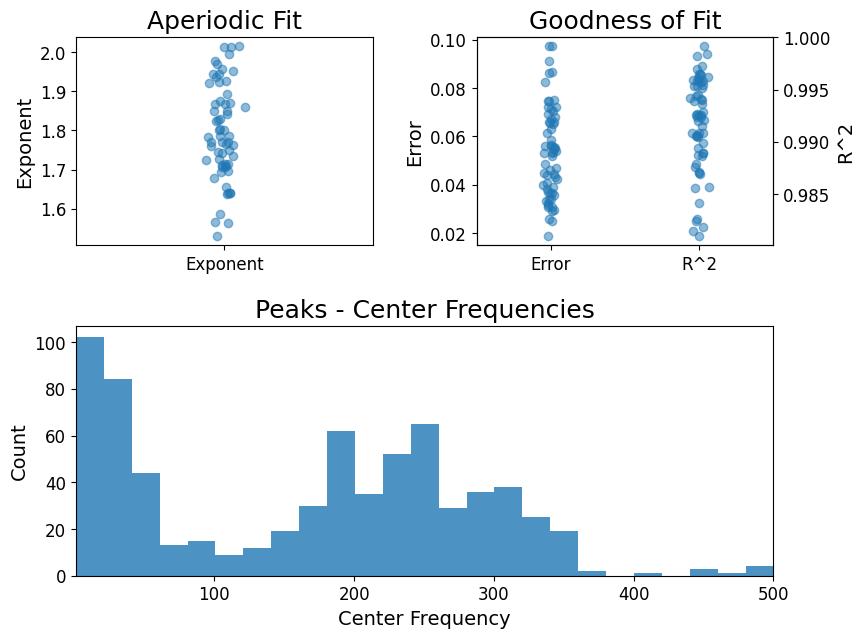

In [271]:
fm_before2.fit(
    np.array(freqs), 
    np.array(ch_bef)
)
fm_before2.plot()

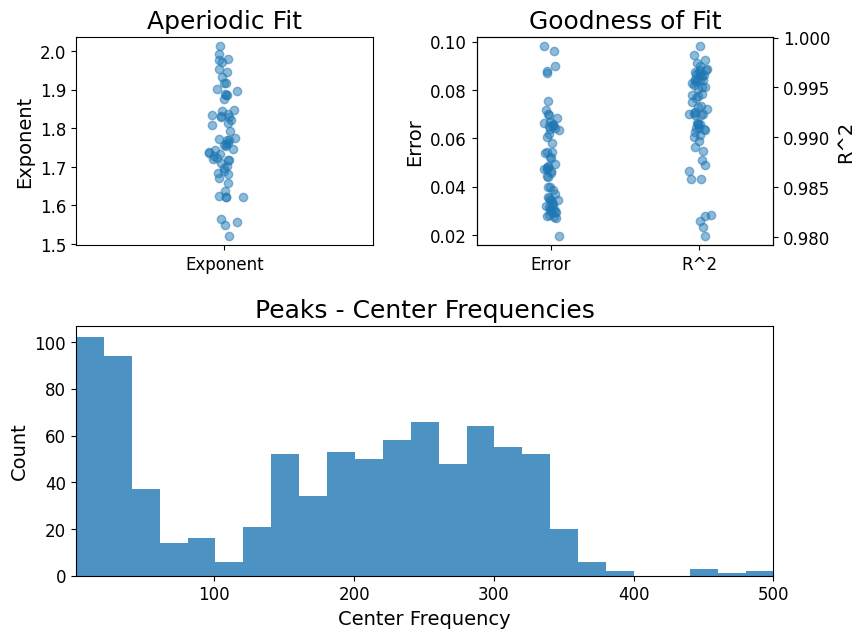

In [272]:
fm_after2.fit(
    np.array(freqs), 
    np.array(ch_aft)
)
fm_after2.plot()

In [273]:
exps_bef = fm_before2.get_params('aperiodic_params', 'exponent')
exps_aft = fm_after2.get_params('aperiodic_params', 'exponent')

## Shown difference 1/F per electrode

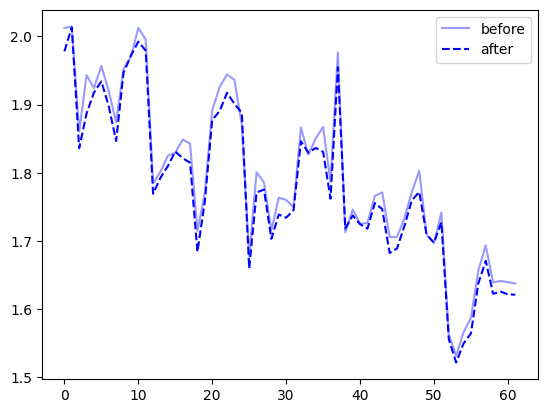

In [274]:
plt.plot(exps_bef, color="blue", alpha=.4, label="before")
plt.plot(exps_aft, '--', color="blue", label="after")
plt.legend()
plt.show()